# Lab 6 – Publish a model Starter

Here is what we will do:
1. Build a pipeline for the Howell height predicts weight
2. Save the model to memory
3. Read in the model into a separate notebook
4. Use the model to creat a server
5. Show th


### Prepare the data

### Read the CSV file:
We will use info() on the data frame to get a first look.  This is mostly a quick sanity check

We are going to let the pipeline create the new features so all input  from 
train, test or prediction goes through the same process.  We leave the functions so they are
available if we need them later.

In [15]:
# third cell -
import pandas as pd
import numpy as np
howell_full = pd.read_csv("Howell.csv", sep=";")


### A Better Plot

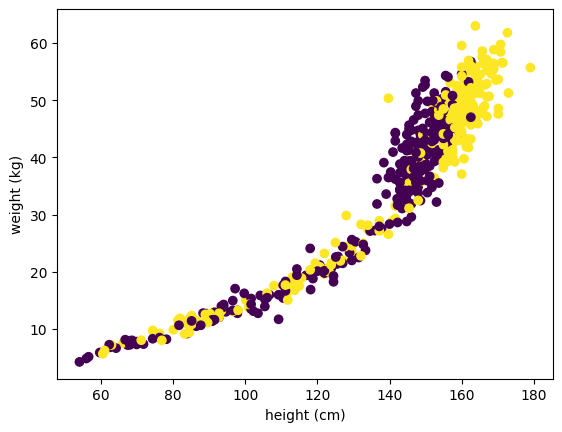

In [16]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']

#plt.scatter(height, weight)
#plt.xlabel('height (cm)')
#plt.ylabel('weight (kg)')
#plt.show()

gender = howell_full['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

age = howell_full['age']
#plt.scatter(age, height, c=gender)
#plt.xlabel('age (years)')
#plt.ylabel('height (cm)')
#plt.show()




### Train/Test Data Split

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(howell_full, 
                        test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))





Train size:  435 Test size:  109


### Train and Evaluate a Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['height']]
y = train_set['weight']

X_test = test_set[['height']]
y_test = test_set['weight']

lr_model = LinearRegression()
lr_model.fit(X,y)

y_pred = lr_model.predict(X)
print('Results for linear regression on training data')
print('  Default settings')
print('Internal parameters:')
print('   Bias is ', lr_model.intercept_)
print('   Coefficients', lr_model.coef_)
print('   Score', lr_model.score(X,y))

print('MAE is  ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2    ', r2_score(y,y_pred))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data')

print('MAE is  ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test,y_test_pred))


Results for linear regression on training data
  Default settings
Internal parameters:
   Bias is  -34.33484184267892
   Coefficients [0.50625269]
   Score 0.8892970528522413
MAE is   3.986801374333733
RMSE is  4.901419255121661
MSE is  24.02391071447738
R^2     0.8892970528522413

Results for linear regression on test data
MAE is   4.268058841968444
RMSE is  5.308233145876227
MSE is  28.177339130979025
R^2     0.8677460846087206


### Plot linear regression model
 Using height to predict weight 

C:\Users\habto\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


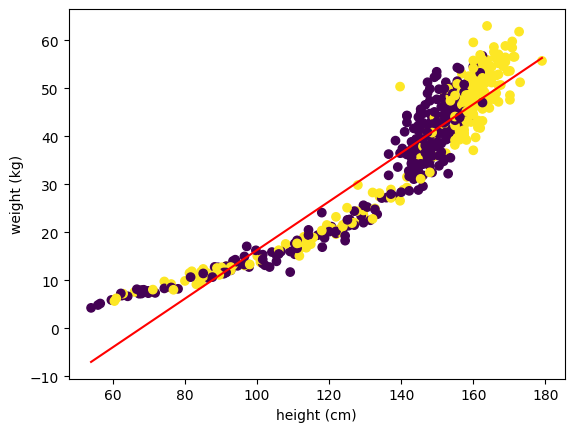

In [19]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']
gender = howell_full['male']
age = howell_full['age']

min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)
x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)

plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')

plt.plot(x_values, y_values,c='red')
plt.show()




### Train and Evaluate a Pipelined Linear Regression Model 

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import StandardScaler 

X = train_set[['height']]
y = train_set['weight']

X_test = test_set[['height']]
y_test = test_set['weight']

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean') 
poly4 = PolynomialFeatures(degree=4, include_bias=False) 
scale = StandardScaler() 

lr_model = LinearRegression()
pipe_model.fit(X,y)

stages = [('imp_mean', imp_mean), 
('poly4', poly4), 
('scale', scale), 
('lr_model', lr_model), 
] 
pipe_model = Pipeline(stages) 

pipe_model.fit(X,y) 
y_pred = pipe_model.predict(X) 
print('Results for pipeline linear regression on training data') 
#print('  Default settings') 
#print('Internal parameters:') 
print('   Bias is ', pipe_model.predict([[0]])) 
#print('   Coefficients', pipe_model.coef_) 
print('   Score', pipe_model.score(X,y))
# Calculate and print the error metrics
print('MAE is  ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2    ', r2_score(y, y_pred))
y_test_pred = pipe_model.predict(X_test) 
print() 
print('Results for pipeline linear regression on test data') 

print('MAE is  ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test,y_test_pred))


Results for pipeline linear regression on training data
   Bias is  [-166.29034128]
   Score 0.9368954928231886
MAE is   2.7616342586302105
RMSE is  3.700602610294631
MSE is  13.694459679319436
R^2     0.9368954928231886

Results for pipeline linear regression on test data
MAE is   3.090635447854638
RMSE is  4.136777328712003
MSE is  17.11292666734561
R^2     0.9196783079821753


C:\Users\habto\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


## Plot pipelined linear regression model
Using height to predict weight 

C:\Users\habto\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


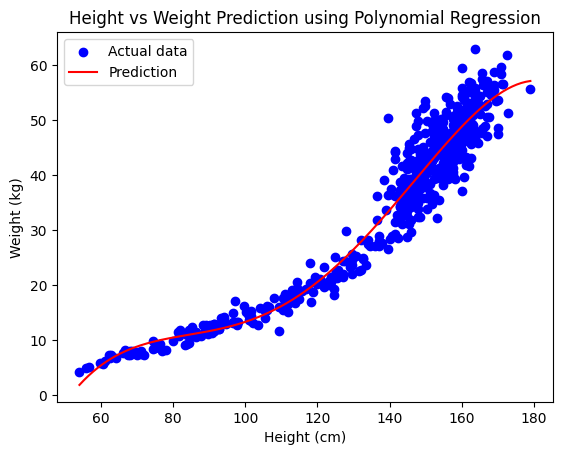

In [33]:
import matplotlib.pyplot as plt
import numpy as np

height = howell_full['height']
weight = howell_full['weight']

# Generate a range of heights for plotting the prediction line
min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height) / (points - 1)
X_values = [min_height + i * step_by for i in range(points)]
inputs = np.array([[x] for x in X_values])

# Use the pipeline model to predict weights for the generated height range
y_values = pipe_model.predict(inputs)

# Scatter plot of the original data points
plt.scatter(height, weight, color='blue', label='Actual data')

# Line plot of the predicted values
plt.plot(X_values, y_values, color='red', label='Prediction')

# Add labels and title
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight Prediction using Polynomial Regression')
plt.legend()

# Show the plot
plt.show()


### Plot pipelined linear regression model 
Using height to predict weight 

In [40]:
# save the model to file
import matplotlib.pyplot as plt
import numpy as np
import pickle 
filename = 'finalized_model.sav' 
pickle.dump(pipe_model, open(filename, 'wb'))
#heights to check 
heights = [[0], [50], [100], [150], [175], [200]] 
weights = pipe_model.predict(heights) 
print('Input heights: ', heights) 
print('Predicted weights are: ', weights) 

Input heights:  [[0], [50], [100], [150], [175], [200]]
Predicted weights are:  [-166.29034128   -1.39346992   13.32603623   41.40189304   56.42986106
   44.77557652]


C:\Users\habto\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


# Results
Basic results for our regression models to predict weight on the Howell data.

| Model | Training Features | RMSE train | R2 train | RMSE test | R2 test |
|:---|:---|:---|:---|:---|:---|
|Linear Regression|Weight|4.90|88.93|4.27|86.77|
|Linear Regression Pipe|Weight|3.70|93.69|4.14|91.97|




## Building a Server 

In [45]:
# Using flask to make an api 
# import necessary libraries and functions 
from logging import exception 
from flask import Flask, jsonify, request, abort 
# creating a Flask app 
app = Flask(__name__) 
# on the terminal type: curl http://127.0.0.1:5000/ 
# returns API when we use GET. 
@app.route('/', methods = ['GET']) 
def home(): 
if(request.method == 'GET'): 
data = "API Example: /weight?height=130.3" 
return data 

IndentationError: expected an indented block (1877749181.py, line 11)

In [46]:
import pickle 
filename = 'finalized_model.sav' 
loaded_model = pickle.load(open(filename, 'rb')) 
# Use the model to predict the weight for the input height. 
# the input height is a query parameter of the URL with GET 
# on the terminal type: curl http://127.0.0.1:5000/weight?height=33.3 
# this returns {"height": 33.3, "weight": -25.860609898265146} 
@app.route('/weight', methods = ['GET']) 
def disp(): 
# get the query parameter as string and fail if not there 
height = request.args.get("height") 
if height is None: 
abort(400, 'Missing height query parameter') 
try: 
height = float(height) 
except ValueError: 
abort(400, 'Height query parameter not float') 
 

IndentationError: expected an indented block (1595020521.py, line 11)

In [47]:
# we get back an array holding the predicted value/s 
try: 
weight = loaded_model.predict([[height]])[0] 
except Exception: 
abort(400, 'Model prediction failed') 
# put response in a dictionary 
response = {} 
response["height"] = height 
response["weight"] = weight 
return jsonify(response) 
# driver function 
if __name__ == '__main__': 
app.run(debug = True)

IndentationError: expected an indented block (3971052075.py, line 3)

In [48]:
from flask import Flask, jsonify, request, abort

# Creating a Flask app
app = Flask(__name__)

# Define an endpoint at the root URL
@app.route('/', methods=['GET'])
def home():
    if request.method == 'GET':  # Check if the request method is GET
        data = "API Example: /weight?height=130.3"  # Example usage message
        return data  # Return the message as the response

# Run the Flask app
if __name__ == '__main__':
    app.run(debug=True)  # Start the Flask app in debug mode

ModuleNotFoundError: No module named 'flask'